In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
import math

In [58]:
df=sns.load_dataset('titanic')

In [59]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [60]:
print(df.shape)
df.info()

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


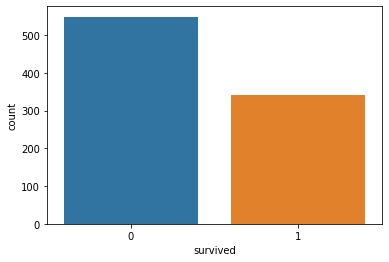

In [61]:
sns.countplot(x='survived',data=df)

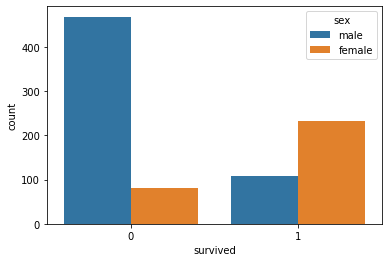

In [62]:
sns.countplot(x='survived',hue='sex',data=df)

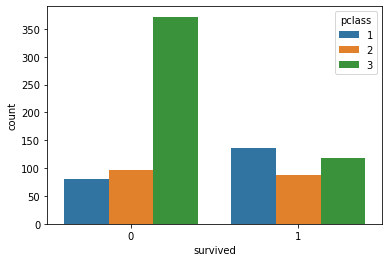

In [63]:
sns.countplot(x='survived',hue='pclass',data=df)

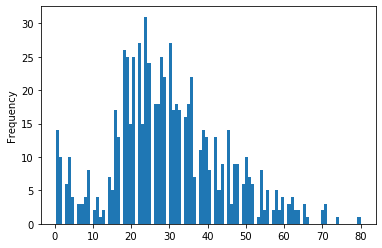

In [64]:
df['age'].plot.hist(bins=100)

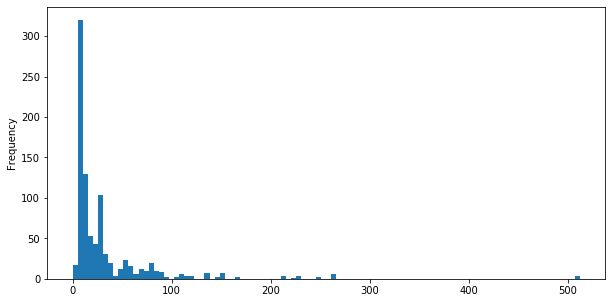

In [65]:
df['fare'].plot.hist(bins=100,figsize=(10,5))

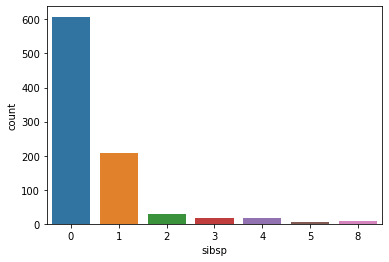

In [66]:
sns.countplot(x='sibsp',data=df)

In [67]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [68]:
df.drop(['deck','age'],axis=1,inplace=True)

In [69]:
df.embark_town.head(3)

0    Southampton
1      Cherbourg
2    Southampton
Name: embark_town, dtype: object

In [70]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [71]:
df=df.fillna({'embark_town':'Southampton'})

In [72]:
df.embarked.head(3)

0    S
1    C
2    S
Name: embarked, dtype: object

In [73]:
df=df.fillna({'embarked':'S'})

In [74]:
df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

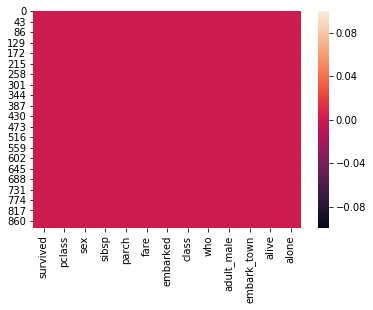

In [75]:
sns.heatmap(df.isnull())

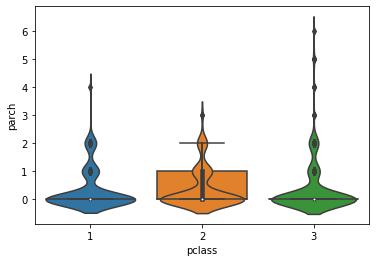

In [76]:
sns.violinplot(x='pclass',y='parch',data=df)
sns.boxplot(x='pclass',y='parch',data=df)

In [77]:
df.head(1)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.25,S,Third,man,True,Southampton,no,False


In [78]:
df.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [79]:
pd.get_dummies(df.sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [80]:
sex=pd.get_dummies(df.sex,drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [81]:
df['male']=sex

In [82]:
pd.get_dummies(df.embarked).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [83]:
Q=pd.get_dummies(df.embarked)['Q']
S=pd.get_dummies(df.embarked)['S']
df['Q']=Q
df['S']=S

In [84]:
pd.get_dummies(df.pclass).head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [85]:
second=pd.get_dummies(df.pclass)[2]
third=pd.get_dummies(df.pclass)[3]
df['second']=second
df['third']=third

In [86]:
df.loc[(df['sex']=='male','sex')]=1
df.loc[(df['sex']=='female','sex')]=0


In [87]:
df.drop(['pclass','sex','embarked','class','who','embark_town','alive'],axis=1,inplace=True)

In [88]:
pd.get_dummies(df.adult_male).head()
adult_male=pd.get_dummies(df.adult_male)[1]
df['adult_male']=adult_male

In [89]:
alone=pd.get_dummies(df.alone)[1]
df.alone=alone

In [90]:
df.drop('adult male',axis=1,inplace=True)

KeyError: "['adult male'] not found in axis"

In [ ]:
df.head()

In [91]:
X=df.drop('survived',axis=1)
Y=df['survived']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [94]:
log.fit(X_train,Y_train)

C:\Users\Windows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
predictions=log.predict(X_test)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        99
           1       0.87      0.69      0.77        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[91,  8],
       [25, 55]], dtype=int64)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8156424581005587